# Imports and Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

# grab datasets from gsheets published csv links
enrollment_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRBK-Yn_jHrMG7wq9o62CF1eS1lg14UiZK9YXsPY4tGy5WduHndXpu87KC-fNNRwc7j4SnQqeaA9up6/pub?gid=0&single=true&output=csv')
scores_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRBK-Yn_jHrMG7wq9o62CF1eS1lg14UiZK9YXsPY4tGy5WduHndXpu87KC-fNNRwc7j4SnQqeaA9up6/pub?gid=699383085&single=true&output=csv')
sped_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRBK-Yn_jHrMG7wq9o62CF1eS1lg14UiZK9YXsPY4tGy5WduHndXpu87KC-fNNRwc7j4SnQqeaA9up6/pub?gid=1606508648&single=true&output=csv')


## Enrollment File

In [2]:
enrollment_df

,student_id,school_name,grade_level_2019
0,13898,School G,1
1,27795,School G,1
2,22938,School E,1
3,22431,School F,1
4,18048,School E,1
...,...,...,...
2783,28744,School D,7
2784,12169,School A,7
2785,24197,School D,8
2786,27656,School D,8


In [3]:
enrollment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student_id        2788 non-null   int64 
 1   school_name       2788 non-null   object
 2   grade_level_2019  2788 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 65.5+ KB


In [4]:
# checking to make sure there isn't anything ~wild~
enrollment_df.describe()

,student_id,grade_level_2019
count,2788.000000,2788.000000
mean,19930.984935,4.233142
std,5734.957900,2.716113
min,10000.000000,0.000000
25%,14987.750000,2.000000
50%,19860.500000,5.000000
75%,24875.500000,7.000000
max,29996.000000,8.000000


In [6]:
# check for duplicate enrollments
enrollment_df.student_id.value_counts()

11220    2
13898    1
20677    1
24413    1
14048    1
        ..
19869    1
12023    1
23404    1
24192    1
29777    1
Name: student_id, Length: 2787, dtype: int64

In [7]:
# duplicate student
# scores file doesn't provide
# any grade level info, so we'll assume 6
# maybe they got moved up?
enrollment_df.loc[enrollment_df.student_id == 11220]

,student_id,school_name,grade_level_2019
1708,11220,School D,6
2780,11220,School D,5


In [8]:
# eliminate duplicate and keep first entry
enrollment_df = enrollment_df.drop_duplicates(subset='student_id',
                                              keep = 'first')

In [9]:
enrollment_df.groupby('grade_level_2019').student_id.count()

grade_level_2019
0    318
1    320
2    320
3    225
4    116
5    347
6    395
7    375
8    371
Name: student_id, dtype: int64

Assuming grade level of '0' is Kindergarten.

In [10]:
# check out student population count
enrollment_df.groupby('school_name').student_id.count()

school_name
School A    371
School B    357
School C    360
School D    400
School E    539
School F    431
School G    329
Name: student_id, dtype: int64

In [11]:
grouped_by_grade_df = pd.DataFrame(enrollment_df.groupby('grade_level_2019').student_id.nunique()).reset_index()
grouped_by_grade_df.loc[grouped_by_grade_df.grade_level_2019 == 0, 'grade_level_2019'] = 'K'

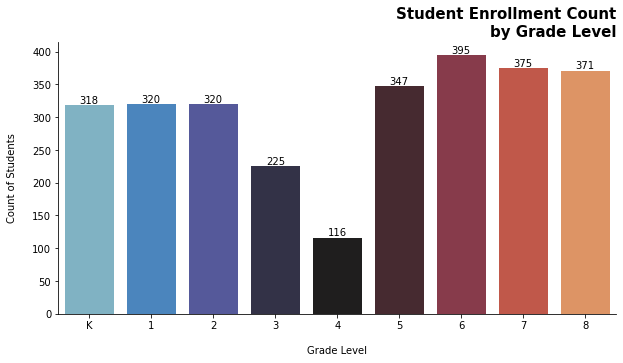

In [12]:
# enrollment by grade level
plt.figure(figsize=(10,5))

ax = sns.barplot(x='grade_level_2019',
                 y='student_id',
                 data=grouped_by_grade_df,
                 palette='icefire')
sns.despine()

ax.bar_label(ax.containers[0])

plt.xlabel('Grade Level', labelpad=15)
plt.ylabel('Count of Students', labelpad=15)

plt.title('Student Enrollment Count\nby Grade Level',
          weight='bold',
          size=15,
          loc='right')
plt.show()

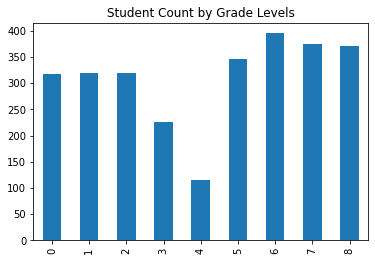

In [13]:
# count by grade levels
enrollment_df.grade_level_2019.value_counts().sort_index().plot.bar()
plt.title('Student Count by Grade Levels')
plt.show()

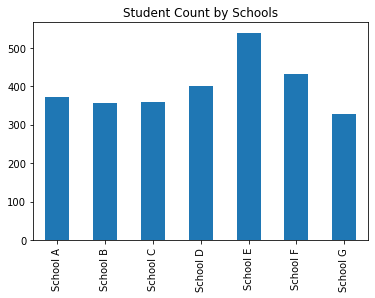

In [14]:
# count by schools
enrollment_df.school_name.value_counts().sort_index().plot.bar()
plt.title('Student Count by Schools')
plt.show()

## Scores

In [15]:
scores_df

,student_id,year,map_term,subject,rit_score,percentile,quartile,typical_fall_to_spring_growth
0,13898,2019,Fall,Reading,161,59,3,18
1,27795,2019,Fall,Reading,158,50,3,19
2,22938,2019,Fall,Reading,162,62,3,18
3,22431,2019,Fall,Reading,162,62,3,18
4,18048,2019,Fall,Reading,166,73,3,17
...,...,...,...,...,...,...,...,...
11113,16492,2019,Spring,Math,181,94,4,.
11114,28883,2019,Spring,Math,166,69,3,.
11115,28277,2019,Spring,Math,155,38,2,.
11116,18061,2019,Spring,Math,146,17,1,.


In [16]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   student_id                     11118 non-null  int64 
 1   year                           11118 non-null  int64 
 2   map_term                       11118 non-null  object
 3   subject                        11118 non-null  object
 4   rit_score                      11118 non-null  object
 5   percentile                     11118 non-null  object
 6   quartile                       11118 non-null  object
 7   typical_fall_to_spring_growth  11118 non-null  object
dtypes: int64(2), object(6)
memory usage: 695.0+ KB


In [17]:
scores_df.describe()

,student_id,year
count,11118.000000,11118.0
mean,19929.907717,2019.0
std,5731.107028,0.0
min,10000.000000,2019.0
25%,14990.000000,2019.0
50%,19865.000000,2019.0
75%,24873.000000,2019.0
max,29996.000000,2019.0


Noticed that 3 variables have 998 '.' values.

* rit_score
* percentile
* quartile

Luckily, they are all from the same records.

In [18]:
missing_rit_df = scores_df.loc[scores_df.quartile == '.']
missing_rit_df

,student_id,year,map_term,subject,rit_score,percentile,quartile,typical_fall_to_spring_growth
5,20392,2019,Fall,Reading,.,.,.,.
36,11466,2019,Fall,Reading,.,.,.,.
42,22276,2019,Fall,Reading,.,.,.,.
45,27828,2019,Fall,Reading,.,.,.,.
61,10451,2019,Fall,Reading,.,.,.,.
...,...,...,...,...,...,...,...,...
11088,14282,2019,Spring,Math,.,.,.,.
11089,21081,2019,Spring,Math,.,.,.,.
11090,17844,2019,Spring,Math,.,.,.,.
11091,29616,2019,Spring,Math,.,.,.,.


There's also another variable with more of the same value. For the above, maybe it means they didn't take that test?

In [19]:
scores_df.loc[scores_df.typical_fall_to_spring_growth == '.']

,student_id,year,map_term,subject,rit_score,percentile,quartile,typical_fall_to_spring_growth
5,20392,2019,Fall,Reading,.,.,.,.
36,11466,2019,Fall,Reading,.,.,.,.
42,22276,2019,Fall,Reading,.,.,.,.
45,27828,2019,Fall,Reading,.,.,.,.
61,10451,2019,Fall,Reading,.,.,.,.
...,...,...,...,...,...,...,...,...
11113,16492,2019,Spring,Math,181,94,4,.
11114,28883,2019,Spring,Math,166,69,3,.
11115,28277,2019,Spring,Math,155,38,2,.
11116,18061,2019,Spring,Math,146,17,1,.


In [20]:
scores_df.subject.value_counts()

Math       5560
Reading    5452
Read        106
Name: subject, dtype: int64

There's also some records where the subject of the test was "Read" instead of "Reading". I've looked at some rows and it looks like it's just an error and not a duplicate of any sort.

In [21]:
# change read to reading
scores_df.loc[scores_df.subject == 'Read', 'subject'] = 'Reading'

In [22]:
scores_df.subject.value_counts()

Math       5560
Reading    5558
Name: subject, dtype: int64

## Special Populations

In [23]:
sped_df.program_name.value_counts()

.         2260
Gifted     197
SPED       188
Tier 2      87
LEP         32
504         19
SPED         1
Name: program_name, dtype: int64

Looks like there's a student marked SPED but it's somehow different. Corrected below.

In [24]:
sped_df.program_name.unique()

array(['SPED', '.', 'LEP', 'Tier 2', 'Gifted', nan, '504', 'SPED '],
      dtype=object)

Yeah, it has a space. Removing it.

In [25]:
sped_df.loc[sped_df.program_name == 'SPED ', 'program_name'] = 'SPED'

In [26]:
sped_df.program_name.value_counts()

.         2260
Gifted     197
SPED       189
Tier 2      87
LEP         32
504         19
Name: program_name, dtype: int64

# Completion Analysis

What percent of students enrolled are completing their MAP assessments?

In [27]:
# how many students enrolled total?
unique_enrolled_count = enrollment_df.student_id.nunique()
unique_enrolled_count

2787

In [28]:
# merge scores to students
merged_df = enrollment_df.merge(scores_df, on='student_id', how='left')

# merge sped program status to students and scores
merged_df = merged_df.merge(sped_df, on='student_id', how='left')

In [29]:
# split into 4 different assessment tables
fall_math_df = merged_df.loc[(merged_df.map_term == 'Fall') &
                             (merged_df.subject == 'Math')]

fall_read_df = merged_df.loc[(merged_df.map_term == 'Fall') &
                             (merged_df.subject == 'Reading')]

spring_math_df = merged_df.loc[(merged_df.map_term == 'Spring') &
                               (merged_df.subject == 'Math')]

spring_read_df = merged_df.loc[(merged_df.map_term == 'Spring') &
                               (merged_df.subject == 'Reading')]

In [30]:
# get count of students that have a score for each assessment
fall_math_count = fall_math_df.loc[~(fall_math_df.rit_score == '.')].shape[0]
fall_read_count = fall_read_df.loc[~(fall_read_df.rit_score == '.')].shape[0]
spring_math_count = spring_math_df.loc[~(spring_math_df.rit_score == '.')].shape[0]
spring_read_count = spring_read_df.loc[~(spring_read_df.rit_score == '.')].shape[0]

In [31]:
fall_math_count

2528

In [32]:
fall_read_count

2544

In [33]:
unique_enrolled_count

2787

In [34]:
# create dictionaries, then dataframe to create graphs
math_dict = {'Fall':round(fall_math_count/unique_enrolled_count*100,2),
             'Spring':round(spring_math_count/unique_enrolled_count*100,2)}

math_completion_df = pd.DataFrame(math_dict, index=[0])

read_dict = {'Fall':round(fall_read_count/unique_enrolled_count*100,2),
             'Spring':round(spring_read_count/unique_enrolled_count*100,2)}

read_completion_df = pd.DataFrame(read_dict, index=[0])

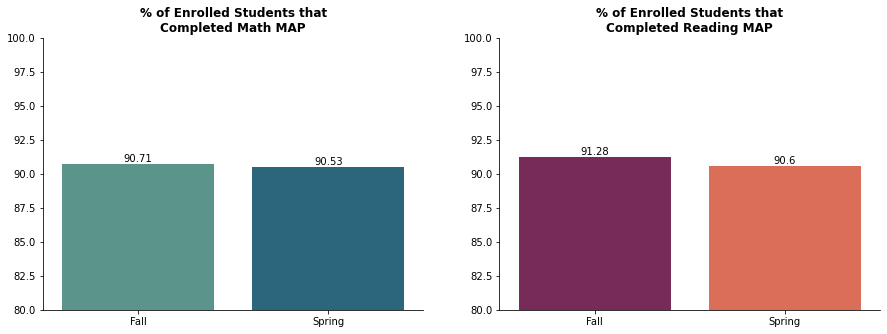

In [35]:
# graph dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax = sns.barplot(data=math_completion_df,
                 palette='crest')
sns.despine()
ax.bar_label(ax.containers[0])
plt.ylim(80,100)
plt.title('% of Enrolled Students that\nCompleted Math MAP',
          weight='bold')

plt.subplot(1,2,2)
ax = sns.barplot(data=read_completion_df,
                 palette='rocket')
sns.despine()
ax.bar_label(ax.containers[0])
plt.ylim(80,100)
plt.title('% of Enrolled Students that\nCompleted Reading MAP',
          weight='bold')

plt.show()

In [36]:
spring_math_count

2523

In [37]:
spring_read_count

2525

Though the above charts don't provide much insight, they do bring up another question:
* What's going on with ~10% of the students for each assessment? Is it a particular school? Maybe a particular grade level?

## Completion by School

In [38]:
# get unique school list to use with a function
school_list = list(enrollment_df.school_name.unique())

# create empty lists to contain dicts
# these will be turned into dataframes
math_dicts_list = []
read_dicts_list = []

def get_completion(school):
    # grab only records from the desired school
    school_df = merged_df.loc[merged_df.school_name == '{}'.format(school)]
    
    # get count of students enrolled at the school
    school_enrolled_count = school_df.student_id.nunique()
    
    # split into 4 different assessment tables
    fall_math_df = school_df.loc[(school_df.map_term == 'Fall') &
                                 (school_df.subject == 'Math')]

    fall_read_df = school_df.loc[(school_df.map_term == 'Fall') &
                                 (school_df.subject == 'Reading')]

    spring_math_df = school_df.loc[(school_df.map_term == 'Spring') &
                                   (school_df.subject == 'Math')]

    spring_read_df = school_df.loc[(school_df.map_term == 'Spring') &
                                   (school_df.subject == 'Reading')]
    
    # get count of students that have a score for each assessment
    fall_math_count = fall_math_df.loc[~(fall_math_df.rit_score == '.')].shape[0]
    fall_read_count = fall_read_df.loc[~(fall_read_df.rit_score == '.')].shape[0]
    spring_math_count = spring_math_df.loc[~(spring_math_df.rit_score == '.')].shape[0]
    spring_read_count = spring_read_df.loc[~(spring_read_df.rit_score == '.')].shape[0]
    
    # create dictionaries and append to our empty dicts list
    temp_math_dict = {}
    temp_math_dict = {'School Name':school,
                      'Math Fall':round(fall_math_count/school_enrolled_count*100,2),
                      'Math Spring':round(spring_math_count/school_enrolled_count*100,2)}
    
    math_dicts_list.append(temp_math_dict)
    
    temp_read_dict = {}
    temp_read_dict = {'School Name':school,
                      'Reading Fall':round(fall_read_count/school_enrolled_count*100,2),
                      'Reading Spring':round(spring_read_count/school_enrolled_count*100,2)}
    
    # fill in the list of dicts
    read_dicts_list.append(temp_read_dict)

In [39]:
# run the function over the list of school names, thus filling in our list of dicts
for school in school_list:
    get_completion(school)
    
# now we'll create dataframes from the list of dicts
math_completion_by_school_df = pd.DataFrame(data=math_dicts_list).sort_values(by='School Name').reset_index(drop=True)

read_completion_by_school_df = pd.DataFrame(data=read_dicts_list).sort_values(by='School Name').reset_index(drop=True)

In [40]:
math_completion_by_school_df

,School Name,Math Fall,Math Spring
0,School A,86.79,89.76
1,School B,91.88,88.80
2,School C,93.33,93.06
3,School D,78.25,83.25
4,School E,97.22,95.73
5,School F,95.36,90.72
6,School G,89.36,90.58


In [41]:
# merge into one
completion_by_school_df = math_completion_by_school_df.merge(read_completion_by_school_df,
                                                             on='School Name',
                                                             how='inner').sort_values(by='School Name').reset_index(drop=True)
# adjust a little bit
# check it out
completion_by_school_df

,School Name,Math Fall,Math Spring,Reading Fall,Reading Spring
0,School A,86.79,89.76,86.25,89.49
1,School B,91.88,88.80,92.72,89.36
2,School C,93.33,93.06,93.33,93.06
3,School D,78.25,83.25,78.25,83.25
4,School E,97.22,95.73,97.03,95.92
5,School F,95.36,90.72,95.36,90.95
6,School G,89.36,90.58,94.22,90.27


In [42]:
# adjust column names of split dataframes
math_completion_by_school_df.columns = ['School Name', 'Fall', 'Spring']
read_completion_by_school_df.columns = ['School Name', 'Fall', 'Spring']

# melt
math_completion_by_school_df = math_completion_by_school_df.melt(id_vars='School Name',
                                                                 var_name='Term',
                                                                 value_name='Percent Completed')

read_completion_by_school_df = read_completion_by_school_df.melt(id_vars='School Name',
                                                                 var_name='Term',
                                                                 value_name='Percent Completed')

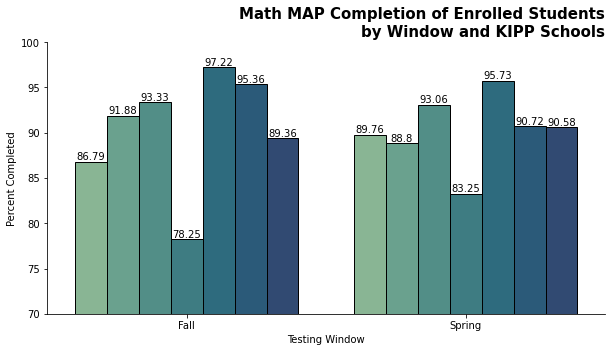

In [68]:
# cool
# let's graph it
plt.figure(figsize=(10,5))

ax_1 = sns.barplot(x='Term',
                   y='Percent Completed',
                   data=math_completion_by_school_df,
                   hue='School Name',
                   palette='crest',
                   edgecolor='black')
sns.despine()
ax_1.bar_label(ax_1.containers[0])
ax_1.bar_label(ax_1.containers[1])
ax_1.bar_label(ax_1.containers[2])
ax_1.bar_label(ax_1.containers[3])
ax_1.bar_label(ax_1.containers[4])
ax_1.bar_label(ax_1.containers[5])
ax_1.bar_label(ax_1.containers[6])

plt.xlabel('Testing Window')
plt.ylim(70,100)

plt.title('Math MAP Completion of Enrolled Students\nby Window and KIPP Schools',
          weight='bold',
          size=15,
          loc='right')

ax_1.legend_.remove()

plt.show()

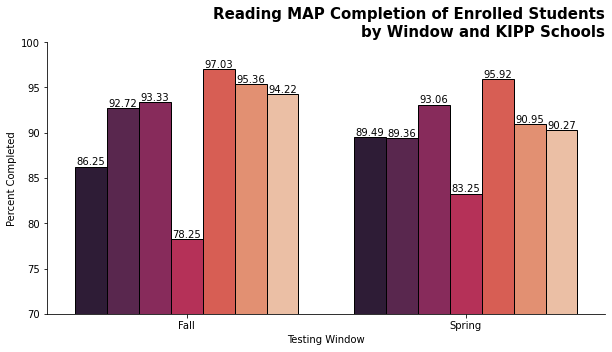

In [69]:
# reading completion
plt.figure(figsize=(10,5))

ax_2 = sns.barplot(x='Term',
                   y='Percent Completed',
                   data=read_completion_by_school_df,
                   hue='School Name',
                   palette='rocket',
                   edgecolor='black')
sns.despine()
ax_2.bar_label(ax_2.containers[0])
ax_2.bar_label(ax_2.containers[1])
ax_2.bar_label(ax_2.containers[2])
ax_2.bar_label(ax_2.containers[3])
ax_2.bar_label(ax_2.containers[4])
ax_2.bar_label(ax_2.containers[5])
ax_2.bar_label(ax_2.containers[6])

plt.legend(loc='lower right')

plt.ylim(70,100)
plt.xlabel('Testing Window')

plt.title('Reading MAP Completion of Enrolled Students\nby Window and KIPP Schools',
          weight='bold',
          size=15,
          loc='right')

ax_2.legend_.remove()

plt.show()

Before we make assumptions about what schools should be provided support for MAP completion, we should look at their enrollment counts.

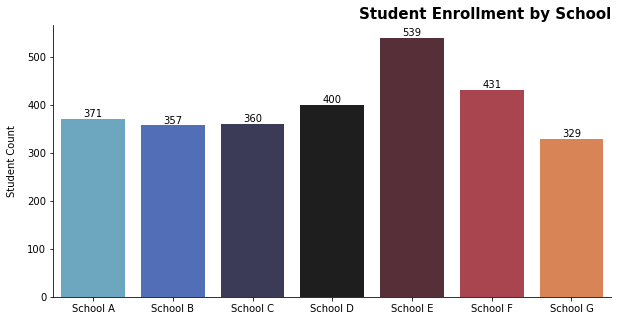

In [45]:
# group by school and get unique student id count
grouped_school_df = pd.DataFrame(merged_df.groupby('school_name').student_id.nunique()).reset_index()

# plot
plt.figure(figsize=(10,5))
ax_3 = sns.barplot(x='school_name',
                   y='student_id',
                   data=grouped_school_df,
                   palette='icefire')
sns.despine()
ax_3.bar_label(ax_3.containers[0])

plt.xlabel('')
plt.ylabel('Student Count',
           labelpad=10)

plt.title('Student Enrollment by School',
          weight='bold',
          size=15,
          loc='right')

plt.show()

School E has the most students, but their completion rates are above the others.

School D shows an opportunity for increasing completion rates, though they do show an increase in completion from Fall to Spring. 

School F has a decrease in completion from Fall to Spring, so that could be another opportunity to investigate.

# Performance Analysis

## Distribution of KIPP RIT Scores

In [46]:
# grab only numericals
fall_math_num_df = fall_math_df.loc[~(fall_math_df.rit_score == '.')]
fall_math_num_df['rit_score'] = fall_math_num_df['rit_score'].astype(int)

fall_read_num_df = fall_read_df.loc[~(fall_read_df.rit_score == '.')]
fall_read_num_df['rit_score'] = fall_read_num_df['rit_score'].astype(int)

spring_math_num_df = spring_math_df.loc[~(spring_math_df.rit_score == '.')]
spring_math_num_df['rit_score'] = spring_math_num_df['rit_score'].astype(int)

spring_read_num_df = spring_read_df.loc[~(spring_read_df.rit_score == '.')]
spring_read_num_df['rit_score'] = spring_read_num_df['rit_score'].astype(int)

# create specifics dfs for plotting
math_num_df = fall_math_num_df.append(spring_math_num_df)
read_num_df = fall_read_num_df.append(spring_read_num_df)

math_num_df.rename(columns={'map_term':'MAP Window'}, inplace=True)
read_num_df.rename(columns={'map_term':'MAP Window'}, inplace=True)

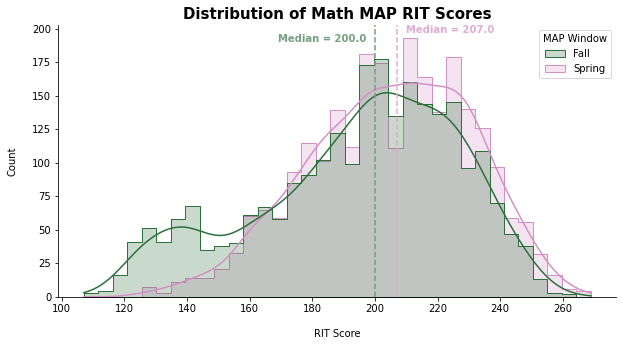

In [47]:
# let's check out the math distributions
plt.figure(figsize=(10,5))

ax = sns.histplot(x='rit_score',
                  data=math_num_df,
                  hue='MAP Window',
                  kde=True,
                  element='step',
                  palette='cubehelix')
sns.despine()

ax.axvline(fall_math_num_df.rit_score.median(),
           color='#73A07D',
           ls='--')
ax.text(x=fall_math_num_df.rit_score.median()-31,
        y=fall_math_num_df.rit_score.median()-10,
        s=('Median = '+str(fall_math_num_df.rit_score.median())),
        color='#73A07D',
        weight='bold')

ax.axvline(spring_math_num_df.rit_score.median(),
           color='#DFACD4',
           ls='--')
ax.text(x=spring_math_num_df.rit_score.median()+3,
        y=spring_math_num_df.rit_score.median()-10,
        s=('Median = '+str(spring_math_num_df.rit_score.median())),
        color='#DFACD4',
        weight='bold')

plt.xlabel('RIT Score',
           labelpad=15)
plt.ylabel('Count',
           labelpad=15)
plt.title('Distribution of Math MAP RIT Scores',
          weight='bold',
          size=15)

plt.show()

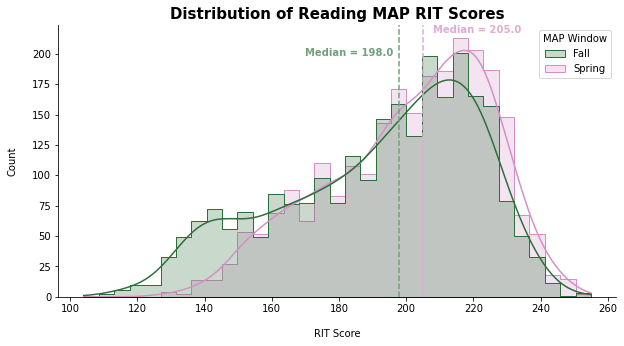

In [48]:
# let's check out the reading distributions
plt.figure(figsize=(10,5))

ax = sns.histplot(x='rit_score',
                  data=read_num_df,
                  hue='MAP Window',
                  kde=True,
                  element='step',
                  palette='cubehelix')
sns.despine()

ax.axvline(fall_read_num_df.rit_score.median(),
           color='#73A07D',
           ls='--')
ax.text(x=fall_read_num_df.rit_score.median()-28,
        y=fall_read_num_df.rit_score.median(),
        s=('Median = '+str(fall_read_num_df.rit_score.median())),
        color='#73A07D',
        weight='bold')

ax.axvline(spring_read_num_df.rit_score.median(),
           color='#DFACD4',
           ls='--')
ax.text(x=spring_read_num_df.rit_score.median()+3,
        y=spring_read_num_df.rit_score.median()+12,
        s=('Median = '+str(spring_read_num_df.rit_score.median())),
        color='#DFACD4',
        weight='bold')

plt.xlabel('RIT Score',
           labelpad=15)
plt.ylabel('Count',
           labelpad=15)
plt.title('Distribution of Reading MAP RIT Scores',
          weight='bold',
          size=15)

plt.show()

## Comparing to MAP Norms

To compare KIPP MAP Scores to the national norms, we have to group by grade levels.

In [49]:
# create mean dfs by grade level for each map window and assessment
# add a column with map national norms from their site

# first math during the fall
fall_math_by_grade_df = pd.DataFrame(fall_math_num_df.groupby('grade_level_2019').rit_score.mean().round(decimals=2)).reset_index()
fall_math_by_grade_df.loc[fall_math_by_grade_df.grade_level_2019 == 0, 'grade_level_2019'] = 'K'
fall_math_map_norms = [139.56, 160.05, 175.04, 188.48, 199.55,
                       209.13, 214.75, 220.21, 224.92]
fall_math_by_grade_df['MAP Norms'] = fall_math_map_norms
fall_math_by_grade_df.columns = ['Grade Level',
                                 'KIPP Mean',
                                 'MAP Mean']

# now math during spring
spring_math_by_grade_df = pd.DataFrame(spring_math_num_df.groupby('grade_level_2019').rit_score.mean().round(decimals=2)).reset_index()
spring_math_by_grade_df.loc[spring_math_by_grade_df.grade_level_2019 == 0, 'grade_level_2019'] = 'K'
spring_math_map_norms = [157.11, 176.40, 189.42, 201.08, 210.51,
                         218.75, 222.88, 226.73, 230.30]
spring_math_by_grade_df['MAP Norms'] = spring_math_map_norms
spring_math_by_grade_df.columns = ['Grade Level',
                                   'KIPP Mean',
                                   'MAP Mean']

# now for reading
fall_read_by_grade_df = pd.DataFrame(fall_read_num_df.groupby('grade_level_2019').rit_score.mean().round(decimals=2)).reset_index()
fall_read_by_grade_df.loc[fall_read_by_grade_df.grade_level_2019 == 0, 'grade_level_2019'] = 'K'
fall_read_map_norms = [136.65, 155.93, 172.35, 186.62, 196.67,
                       204.48, 210.17, 214.20, 218.01]
fall_read_by_grade_df['MAP Norms'] = fall_read_map_norms
fall_read_by_grade_df.columns = ['Grade Level',
                                 'KIPP Mean',
                                 'MAP Mean']

# now for reading in the spring
spring_read_by_grade_df = pd.DataFrame(spring_read_num_df.groupby('grade_level_2019').rit_score.mean().round(decimals=2)).reset_index()
spring_read_by_grade_df.loc[spring_read_by_grade_df.grade_level_2019 == 0, 'grade_level_2019'] = 'K'
spring_read_map_norms = [153.09, 171.40, 185.57, 197.12, 204.83,
                         210.98, 215.36, 218.36, 221.66]
spring_read_by_grade_df['MAP Norms'] = spring_read_map_norms
spring_read_by_grade_df.columns = ['Grade Level',
                                   'KIPP Mean',
                                   'MAP Mean']

# melt
fall_math_by_grade_df = fall_math_by_grade_df.melt(id_vars='Grade Level',
                                                   var_name='Organization',
                                                   value_name='Mean')

spring_math_by_grade_df = spring_math_by_grade_df.melt(id_vars='Grade Level',
                                                       var_name='Organization',
                                                       value_name='Mean')

fall_read_by_grade_df = fall_read_by_grade_df.melt(id_vars='Grade Level',
                                                   var_name='Organization',
                                                   value_name='Mean')

spring_read_by_grade_df = spring_read_by_grade_df.melt(id_vars='Grade Level',
                                                       var_name='Organization',
                                                       value_name='Mean')



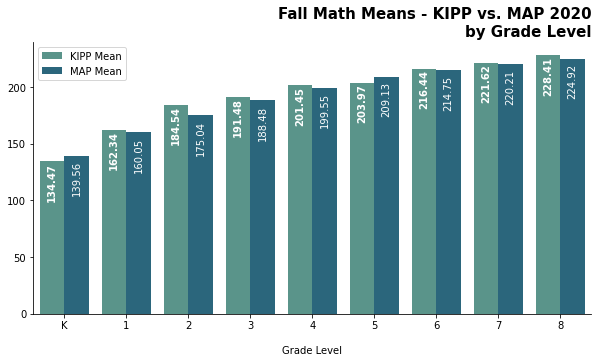

In [50]:
# time for some pretty charts
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Grade Level',
                 y='Mean',
                 data=fall_math_by_grade_df,
                 hue='Organization',
                 palette='crest')
sns.despine()

ax.bar_label(ax.containers[0],
             rotation=90,
             padding=-40,
             color='white',
             weight='bold')

ax.bar_label(ax.containers[1],
             rotation=90,
             padding=-40,
             color='white')

plt.ylabel('')
plt.xlabel('Grade Level',
           labelpad=15)

plt.legend(title='')
plt.title('Fall Math Means - KIPP vs. MAP 2020\nby Grade Level',
          weight='bold',
          size=15,
          loc='right')

plt.show()

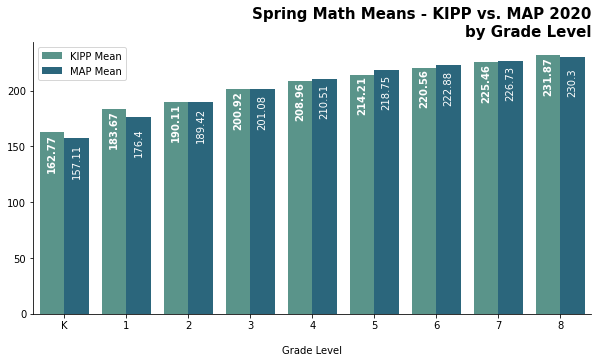

In [51]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Grade Level',
                 y='Mean',
                 data=spring_math_by_grade_df,
                 hue='Organization',
                 palette='crest')
sns.despine()

ax.bar_label(ax.containers[0],
             rotation=90,
             padding=-40,
             color='white',
             weight='bold')

ax.bar_label(ax.containers[1],
             rotation=90,
             padding=-40,
             color='white')

plt.ylabel('')
plt.xlabel('Grade Level',
           labelpad=15)

plt.legend(title='')
plt.title('Spring Math Means - KIPP vs. MAP 2020\nby Grade Level',
          weight='bold',
          size=15,
          loc='right')

plt.show()

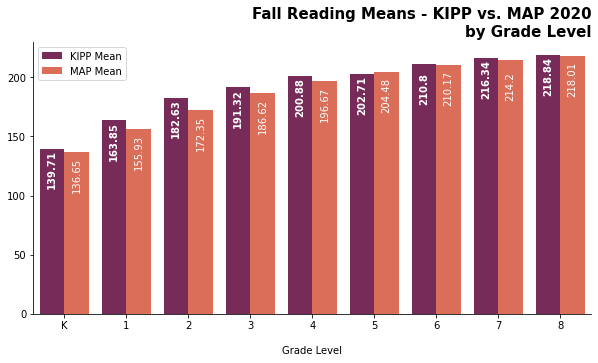

In [52]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Grade Level',
                 y='Mean',
                 data=fall_read_by_grade_df,
                 hue='Organization',
                 palette='rocket')
sns.despine()

ax.bar_label(ax.containers[0],
             rotation=90,
             padding=-40,
             color='white',
             weight='bold')

ax.bar_label(ax.containers[1],
             rotation=90,
             padding=-40,
             color='white')

plt.ylabel('')
plt.xlabel('Grade Level',
           labelpad=15)

plt.legend(title='')
plt.title('Fall Reading Means - KIPP vs. MAP 2020\nby Grade Level',
          weight='bold',
          size=15,
          loc='right')

plt.show()

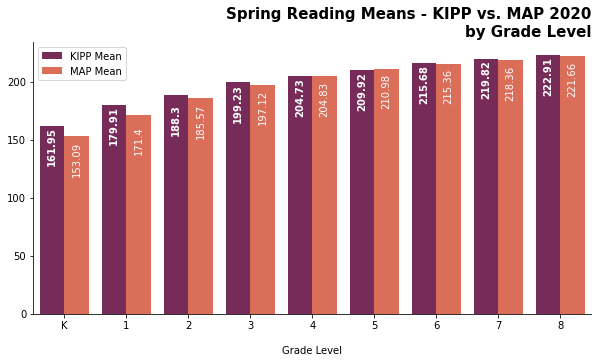

In [53]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Grade Level',
                 y='Mean',
                 data=spring_read_by_grade_df,
                 hue='Organization',
                 palette='rocket')
sns.despine()

ax.bar_label(ax.containers[0],
             rotation=90,
             padding=-40,
             color='white',
             weight='bold')

ax.bar_label(ax.containers[1],
             rotation=90,
             padding=-40,
             color='white')

plt.ylabel('')
plt.xlabel('Grade Level',
           labelpad=15)

plt.legend(title='')
plt.title('Spring Reading Means - KIPP vs. MAP 2020\nby Grade Level',
          weight='bold',
          size=15,
          loc='right')

plt.show()

## Growth Analysis

Analyzing students' growth on the MAP assessments from Fall to Spring.

In [54]:
fall_math_num_df

,student_id,school_name,grade_level_2019,year,map_term,subject,rit_score,percentile,quartile,typical_fall_to_spring_growth,program_name
1,13898,School G,1,2019,Fall,Math,166,69,3,20,SPED
5,27795,School G,1,2019,Fall,Math,135,4,1,27,SPED
9,22938,School E,1,2019,Fall,Math,160,52,3,21,.
13,22431,School F,1,2019,Fall,Math,164,64,3,20,.
17,18048,School E,1,2019,Fall,Math,151,28,2,23,.
...,...,...,...,...,...,...,...,...,...,...,...
11106,13879,School D,6,2019,Fall,Math,229,68,3,4,.
11108,28744,School D,7,2019,Fall,Math,214,25,2,6,.
11110,12169,School A,7,2019,Fall,Math,220,37,2,5,.
11114,27656,School D,8,2019,Fall,Math,199,5,1,6,.


In [55]:
# need to create a variable showing growth
# the difference between their fall and spring rit score
selected_fall_math_df = fall_math_num_df[['student_id', 'school_name', 'rit_score', 'grade_level_2019', 'program_name']]
selected_fall_math_df.columns = ['Student ID', 'School Name', 'Fall RIT', 'Grade Level', 'Program']
selected_spring_math_df = spring_math_num_df[['student_id', 'rit_score']]
selected_spring_math_df.columns = ['Student ID', 'Spring RIT']
merged_math_rit_df = selected_fall_math_df.merge(selected_spring_math_df, how='inner')

merged_math_rit_df['KIPP Mean Growth'] = merged_math_rit_df['Spring RIT'] - merged_math_rit_df['Fall RIT']

# now for reading
selected_fall_read_df = fall_read_num_df[['student_id', 'school_name', 'rit_score', 'grade_level_2019', 'program_name']]
selected_fall_read_df.columns = ['Student ID', 'School Name', 'Fall RIT', 'Grade Level', 'Program']
selected_spring_read_df = spring_read_num_df[['student_id', 'rit_score']]
selected_spring_read_df.columns = ['Student ID', 'Spring RIT']
merged_read_rit_df = selected_fall_read_df.merge(selected_spring_read_df, how='inner')

merged_read_rit_df['KIPP Mean Growth'] = merged_read_rit_df['Spring RIT'] - merged_read_rit_df['Fall RIT']

In [56]:
merged_math_rit_df.shape[0]

2271

In [57]:
merged_read_rit_df.shape[0]

2290

In [58]:
# get mean of growth by grade level
math_mean_growth_by_grade_df = pd.DataFrame(merged_math_rit_df.groupby(['Grade Level'])['KIPP Mean Growth'].mean().round(decimals=2)).reset_index()
read_mean_growth_by_grade_df = pd.DataFrame(merged_read_rit_df.groupby(['Grade Level'])['KIPP Mean Growth'].mean().round(decimals=2)).reset_index()

# add the map growth norms
math_mean_growth_by_grade_df['MAP Growth Norm'] = [17.54, 16.35, 14.38,
                                                   12.60, 10.96, 9.61,
                                                   8.13, 6.52, 5.38]

read_mean_growth_by_grade_df['MAP Growth Norm'] = [16.45, 15.47, 13.22,
                                                   10.50, 8.16, 6.50,
                                                   5.19, 4.16, 3.65]

In [59]:
# melt dfs for graphing
melted_math_df = math_mean_growth_by_grade_df.melt(id_vars='Grade Level',
                                                   var_name='Organization',
                                                   value_name='Mean Growth')

melted_read_df = read_mean_growth_by_grade_df.melt(id_vars='Grade Level',
                                                   var_name='Organization',
                                                   value_name='Mean Growth')

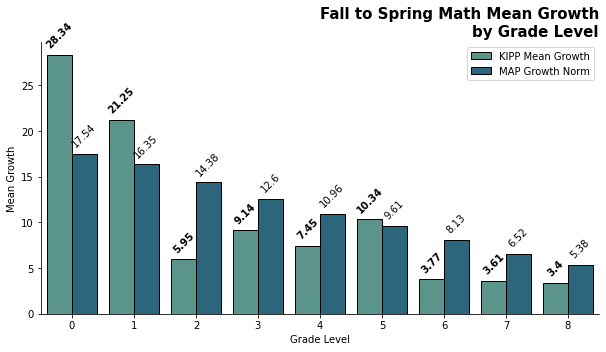

In [60]:

plt.figure(figsize=(10,5))

ax_1 = sns.barplot(x='Grade Level',
                   y='Mean Growth',
                   data=melted_math_df,
                   hue='Organization',
                   palette='crest',
                   edgecolor='black')
sns.despine()
ax_1.bar_label(ax_1.containers[0],
               rotation=45,
               color='black',
               weight='bold',
               padding=5)
ax_1.bar_label(ax_1.containers[1],
               rotation=45,
               color='black',
               padding=5)

plt.legend(title='')

plt.title('Fall to Spring Math Mean Growth\nby Grade Level',
          weight='bold',
          size=15,
          loc='right')

plt.show()

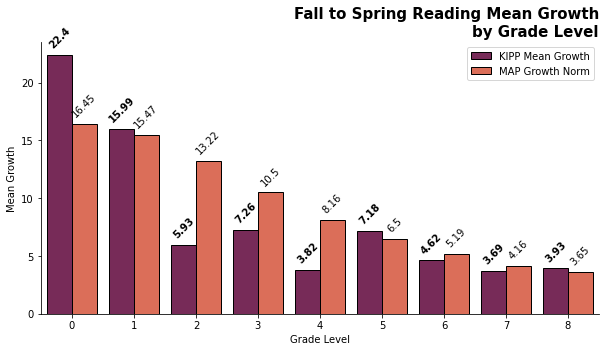

In [61]:

plt.figure(figsize=(10,5))

ax_1 = sns.barplot(x='Grade Level',
                   y='Mean Growth',
                   data=melted_read_df,
                   hue='Organization',
                   palette='rocket',
                   edgecolor='black')
sns.despine()
ax_1.bar_label(ax_1.containers[0],
               rotation=45,
               color='black',
               padding=5,
               weight='bold')
ax_1.bar_label(ax_1.containers[1],
               rotation=45,
               color='black',
               padding=5)

plt.legend(title='')

plt.title('Fall to Spring Reading Mean Growth\nby Grade Level',
          weight='bold',
          size=15,
          loc='right')

plt.show()

## Growth by Program

In [62]:
# get mean of growth by grade level
math_mean_growth_by_program_df = pd.DataFrame(merged_math_rit_df.groupby(['Program'])['KIPP Mean Growth'].mean().round(decimals=2)).reset_index()
read_mean_growth_by_program_df = pd.DataFrame(merged_read_rit_df.groupby(['Program'])['KIPP Mean Growth'].mean().round(decimals=2)).reset_index()

In [63]:
# melt dfs for graphing
melted_math_df = math_mean_growth_by_program_df.melt(id_vars='Program',
                                                   var_name='Organization',
                                                   value_name='Mean Growth')

melted_read_df = read_mean_growth_by_program_df.melt(id_vars='Program',
                                                   var_name='Organization',
                                                   value_name='Mean Growth')

In [64]:
# adjust dot value for no program
melted_math_df.loc[melted_math_df.Program == '.', 'Program'] = 'No Program'
melted_read_df.loc[melted_read_df.Program == '.', 'Program'] = 'No Program'

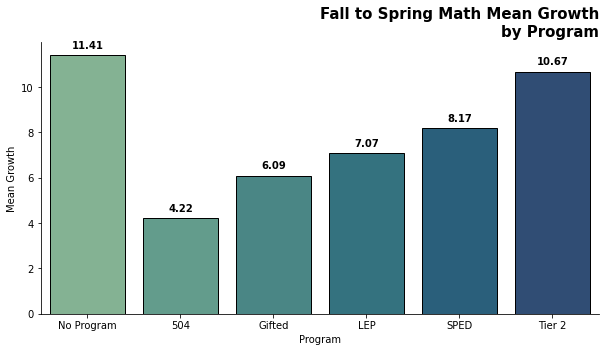

In [65]:

plt.figure(figsize=(10,5))

ax_1 = sns.barplot(x='Program',
                   y='Mean Growth',
                   data=melted_math_df,
                   palette='crest',
                   edgecolor='black')
sns.despine()
ax_1.bar_label(ax_1.containers[0],
               rotation=0,
               color='black',
               weight='bold',
               padding=5)

plt.title('Fall to Spring Math Mean Growth\nby Program',
          weight='bold',
          size=15,
          loc='right')

plt.show()

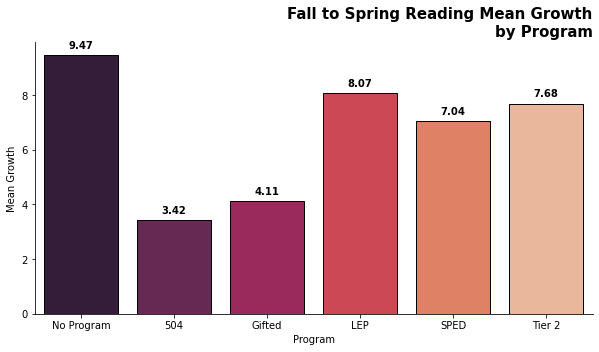

In [66]:

plt.figure(figsize=(10,5))

ax_1 = sns.barplot(x='Program',
                   y='Mean Growth',
                   data=melted_read_df,
                   palette='rocket',
                   edgecolor='black')
sns.despine()
ax_1.bar_label(ax_1.containers[0],
               rotation=0,
               color='black',
               weight='bold',
               padding=5)

plt.title('Fall to Spring Reading Mean Growth\nby Program',
          weight='bold',
          size=15,
          loc='right')

plt.show()